In [21]:
# lab method implementation for preprocessing
from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [53]:
img_rgb = cv.imread('../data/men/1/1_men (4).JPG',cv.IMREAD_COLOR)
img_lab = cv.cvtColor(img_rgb,cv.COLOR_BGR2LAB)
l,a,b = cv.split(img_lab)

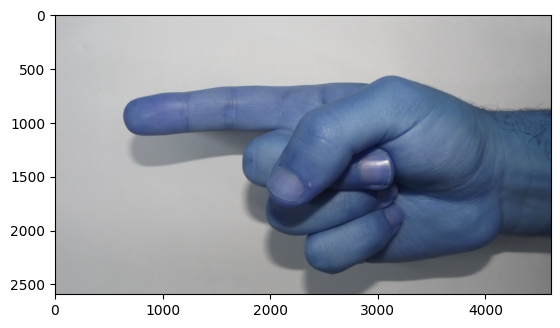

In [54]:
l_mean = np.mean(l)
a_mean = np.mean(a)
b_mean = np.mean(b)
l_std = np.std(l)
if(a_mean + b_mean < 256):
    print("help")
    img_rgb[:,:,0][l <= l_mean - l_std /3  ] = 0
    img_rgb[:,:,1][l <= l_mean - l_std /3 ] = 0
    img_rgb[:,:,2][l <= l_mean - l_std /3 ] = 0
plt.imshow(img_rgb)

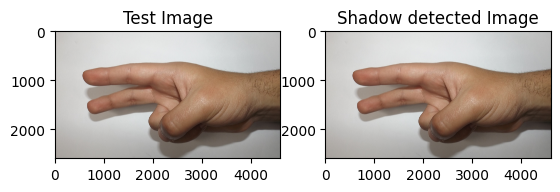

In [43]:
#This file contains the python implementation of shadow detector for satellite imagery
#Author: Bhavan Vasu
import cv2 as cv2
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
filename1= "../data/men/2/2_men (3).JPG"
rgb = Image.open(filename1)
rgb = np.asarray(rgb)
plt.figure()
plt.subplot(1,2,1)
plt.title('Test Image')
plt.imshow(rgb)
image_B = np.copy(rgb[:, :, 0])
image_G = np.copy(rgb[:, :, 1])
image_R = np.copy(rgb[:, :, 2]) 
s=np.shape(rgb)

#Converting RGB to LAB color space
lab = color.rgb2lab(rgb)
image_b = np.copy(lab[:, :, 0])
image_a = np.copy(lab[:, :, 1])
image_l = np.copy(lab[:, :, 2])

lm=np.mean(lab[:,:,0], axis=(0, 1))
am=np.mean(lab[:,:,1], axis=(0, 1))
bm=np.mean(lab[:,:,2], axis=(0, 1))

#Creating empty mask for masking shadow
mas = np.empty([rgb.shape[0], rgb.shape[1]], dtype = bool)
lb=lab[:,:,0]+lab[:,:,2]

#Hand crafted thresholds: Dataset specific
if (am+bm)<=15:
 mas[(image_l <=(lm-(np.std(image_l))/15))] = False
else:
 mas[(image_l+image_b)<=50] = False
B_masked = np.ma.masked_array(image_b, mask = mas)
G_masked = np.ma.masked_array(image_G, mask = mas)
R_masked = np.ma.masked_array(image_R, mask = mas) 
mam = np.dstack([rgb, (~mas).astype(np.uint8)*255])

plt.subplot(1,2,2)
plt.imshow(mam)
plt.title('Shadow detected Image')
plt.show()


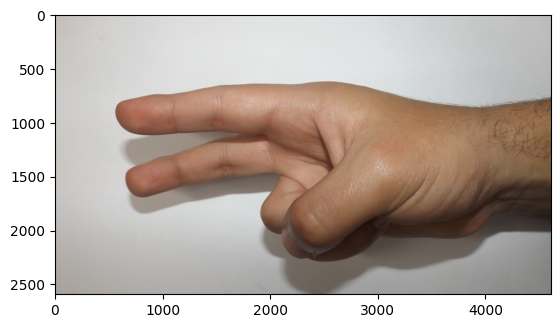

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = np.array(Image.open("../data/men/2/2_men (3).JPG"))
# image = cv.cvtColor(image,cv.COLOR_RGB2LAB)
# print(image[1500,3000])
# print(image[1750,1000])
plt.imshow(image)
# rgb(204,162,140)
# rgb(156,146,136)


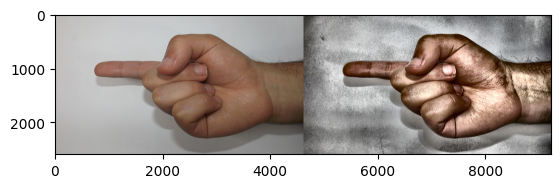

In [1]:
# contrast enhancement
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io


img = io.imread('../data/men/1/1_men (4).JPG')
# converting to LAB color space
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=20.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
result = np.hstack((img, enhanced_img))
plt.imshow(result)
# cv2.imshow('Result', result)

rgb(148,108,94)
rgb(171,167,163)

rgb(120,73,60)
rgb(130,125,121)

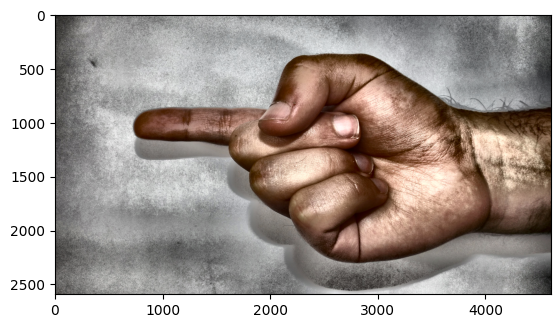

In [13]:
def enhance_image(img):
    se = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).astype('uint8')
    enhanced_image = np.array(img).astype('uint8')
    enhanced_image = cv.dilate(
        enhanced_image, se, iterations=7
    )
    enhanced_image = cv.erode(
        enhanced_image, se, iterations=7
    )
    return enhanced_image

def get_image_with_skin_color_hsv(img):
    lower_hsv = np.array([0, 48, 80], dtype="uint8")
    upper_hsv = np.array([20, 255, 255], dtype="uint8")
    hsv_image = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    skin_region = cv.inRange(hsv_image, lower_hsv, upper_hsv)
    return skin_region

def get_image_with_skin_color(img):
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    Cb = (B - Y) * 0.564 + 128
    Cr = (R - Y) * 0.713 + 128
    outImg = (Cb >= 77) * (Cb <= 127) * (Cr >= 133) * (Cr <= 187)
    return outImg



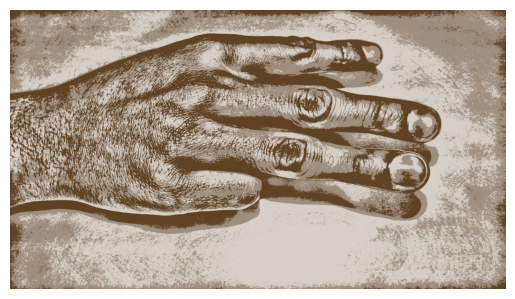

In [25]:
# segmentation using k means
img = enhanced_img

twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 3 # number of clusters
attempts = 10 # number of attempts

ret,label,center=cv2.kmeans(twoDimage,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
plt.axis("off")
plt.imshow(result_image)


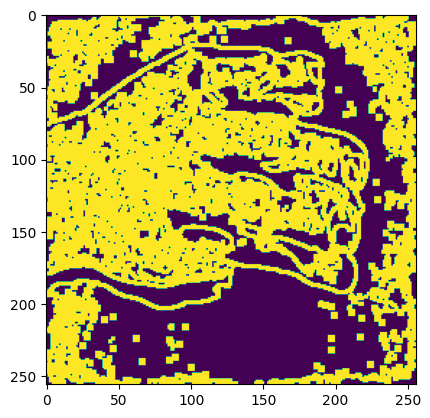

In [29]:
# segmentation using edge detection
img = enhanced_img
img = cv2.resize(img,(256,256))

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.imshow(edges)
